In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table

from utils.data_processing_clickstream import (
    process_bronze_clickstream,
    process_silver_clickstream)

from utils.data_processing_attributes import (
    process_bronze_attributes,
    process_silver_attributes)

from utils.data_processing_financials import (
    process_bronze_financials,
    process_silver_financials)

from utils.data_processing_gold_features import (
    process_gold_customer_feature_store)

## set up pyspark session

In [2]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/07 06:50:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/07 06:50:13 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## set up config

In [3]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2024-12-01"

In [4]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01']

## Build Bronze Table

In [5]:
# create bronze datalake
bronze_lms_directory = "datamart/bronze/lms/"

if not os.path.exists(bronze_lms_directory):
    os.makedirs(bronze_lms_directory)

In [6]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table(date_str, bronze_lms_directory, spark)
    utils.data_processing_clickstream.process_bronze_clickstream(date_str, bronze_lms_directory, spark)
    utils.data_processing_attributes.process_bronze_attributes(date_str, bronze_lms_directory, spark)
    utils.data_processing_financials.process_bronze_financials(date_str, bronze_lms_directory, spark)

2023-01-01row count: 530


saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_01_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_01_01.csv, row count: 530
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_01_01.csv, row count: 530


2023-02-01row count: 1031
saved to: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_02_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_02_01.csv, row count: 501
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_02_01.csv, row count: 501
2023-03-01row count: 1537
saved to: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_03_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_03_01.csv, row count: 506
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_03_01.csv, row count: 506
2023-04-01row count: 2047
saved to: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_04_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_04_01.csv, row count: 510
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_04_01.csv, row count: 510
2023-05-01row count: 2568
saved to: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_05_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_05_01.csv, row count: 521
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_05_01.csv, row count: 521
2023-06-01row count: 3085
saved to: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_06_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_06_01.csv, row count: 517
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_06_01.csv, row count: 517
2023-07-01row count: 3556
saved to: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_07_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_07_01.csv, row count: 471
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_07_01.csv, row count: 471
2023-08-01row count: 4037
saved to: datamart/bronze/lms/bronze_loan_daily_2023_08_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_08_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_08_01.csv, row count: 481
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_08_01.csv, row count: 481
2023-09-01row count: 4491
saved to: datamart/bronze/lms/bronze_loan_daily_2023_09_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_09_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_09_01.csv, row count: 454
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_09_01.csv, row count: 454
2023-10-01row count: 4978
saved to: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_10_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_10_01.csv, row count: 487
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_10_01.csv, row count: 487
2023-11-01row count: 5469
saved to: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_11_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_11_01.csv, row count: 491
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_11_01.csv, row count: 491
2023-12-01row count: 5428
saved to: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2023_12_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2023_12_01.csv, row count: 489
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2023_12_01.csv, row count: 489
2024-01-01row count: 5412
saved to: datamart/bronze/lms/bronze_loan_daily_2024_01_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_01_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_01_01.csv, row count: 485
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_01_01.csv, row count: 485
2024-02-01row count: 5424
saved to: datamart/bronze/lms/bronze_loan_daily_2024_02_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_02_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_02_01.csv, row count: 518
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_02_01.csv, row count: 518
2024-03-01row count: 5425
saved to: datamart/bronze/lms/bronze_loan_daily_2024_03_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_03_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_03_01.csv, row count: 511
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_03_01.csv, row count: 511
2024-04-01row count: 5417
saved to: datamart/bronze/lms/bronze_loan_daily_2024_04_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_04_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_04_01.csv, row count: 513
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_04_01.csv, row count: 513
2024-05-01row count: 5391
saved to: datamart/bronze/lms/bronze_loan_daily_2024_05_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_05_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_05_01.csv, row count: 491
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_05_01.csv, row count: 491
2024-06-01row count: 5418
saved to: datamart/bronze/lms/bronze_loan_daily_2024_06_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_06_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_06_01.csv, row count: 498
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_06_01.csv, row count: 498
2024-07-01row count: 5442
saved to: datamart/bronze/lms/bronze_loan_daily_2024_07_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_07_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_07_01.csv, row count: 505
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_07_01.csv, row count: 505
2024-08-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_08_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_08_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_08_01.csv, row count: 543
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_08_01.csv, row count: 543
2024-09-01row count: 5537
saved to: datamart/bronze/lms/bronze_loan_daily_2024_09_01.csv
[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_09_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_09_01.csv, row count: 493
[BRONZE][fina

[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_11_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_11_01.csv, row count: 488
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_11_01.csv, row count: 488
2024-12-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_12_01.csv, row count: 8974
[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_12_01.csv, row count: 515
[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_12_01.csv, row count: 515


In [7]:
# inspect Bronze outputs for all datasets

loan_bronze_df = utils.data_processing_bronze_table.process_bronze_table(date_str, bronze_lms_directory, spark)
display(loan_bronze_df.toPandas())

click_bronze_df = utils.data_processing_clickstream.process_bronze_clickstream(date_str, bronze_lms_directory, spark)
display(click_bronze_df.toPandas())

attr_bronze_df = utils.data_processing_attributes.process_bronze_attributes(date_str, bronze_lms_directory, spark)
display(attr_bronze_df.toPandas())

fin_bronze_df = utils.data_processing_financials.process_bronze_financials(date_str, bronze_lms_directory, spark)
display(fin_bronze_df.toPandas())


2024-12-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,9,10000,1000.0,1000.0,0.0,1000.0,2024-12-01
1,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,8,10000,1000.0,0.0,6000.0,8000.0,2024-12-01
2,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,2,10000,1000.0,1000.0,0.0,8000.0,2024-12-01
3,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,0,10000,0.0,0.0,0.0,10000.0,2024-12-01
4,CUS_0x1048_2024_02_01,CUS_0x1048,2024-02-01,10,10,10000,1000.0,0.0,9000.0,9000.0,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...
5526,CUS_0xfe3_2024_04_01,CUS_0xfe3,2024-04-01,10,8,10000,1000.0,1000.0,0.0,2000.0,2024-12-01
5527,CUS_0xff3_2024_06_01,CUS_0xff3,2024-06-01,10,6,10000,1000.0,1000.0,0.0,4000.0,2024-12-01
5528,CUS_0xff4_2024_12_01,CUS_0xff4,2024-12-01,10,0,10000,0.0,0.0,0.0,10000.0,2024-12-01
5529,CUS_0xff6_2024_10_01,CUS_0xff6,2024-10-01,10,2,10000,1000.0,1000.0,0.0,8000.0,2024-12-01


[BRONZE][clickstream] saved to: datamart/bronze/lms/bronze_clickstream_2024_12_01.csv, row count: 8974


,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date
0,145,189,109,134,196,-37,101,82,111,24,...,65,249,200,185,-83,-18,-76,30,CUS_0x1037,2024-12-01
1,40,184,187,75,192,146,38,109,353,141,...,-14,193,125,117,215,91,33,255,CUS_0x1069,2024-12-01
2,98,121,180,200,95,48,59,194,76,84,...,167,101,92,185,98,68,-60,116,CUS_0x114a,2024-12-01
3,85,96,19,47,30,39,-32,210,-81,206,...,143,94,139,237,78,187,77,33,CUS_0x1184,2024-12-01
4,98,45,155,56,112,47,52,138,153,225,...,-43,142,121,10,189,110,264,241,CUS_0x1297,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,414,22,72,57,142,192,11,139,24,63,...,179,91,20,189,-35,-19,15,66,CUS_0xdf6,2024-12-01
8970,116,-124,-108,212,-21,227,146,112,186,-65,...,38,226,319,98,9,152,17,14,CUS_0xe23,2024-12-01
8971,237,-3,-49,375,144,41,-170,324,19,266,...,7,102,64,191,124,220,231,75,CUS_0xe4e,2024-12-01
8972,5,67,211,83,207,-41,325,14,-18,41,...,109,266,28,157,131,116,101,131,CUS_0xedd,2024-12-01


[BRONZE][attributes] saved to: datamart/bronze/lms/bronze_attributes_2024_12_01.csv, row count: 515


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x103e,Tim Kellyf,40,155-72-8070,Scientist,2024-12-01
1,CUS_0x1195,Alexk,31,822-48-3629,Manager,2024-12-01
2,CUS_0x1197,Nayako,28,799-23-8283,_______,2024-12-01
3,CUS_0x11e2,Valetkevitchr,34,809-04-1419,Musician,2024-12-01
4,CUS_0x11ec,William Schombergh,34,417-74-2163,Journalist,2024-12-01
...,...,...,...,...,...,...
510,CUS_0xe6c,Doris Frankelh,26,172-24-1577,Entrepreneur,2024-12-01
511,CUS_0xe99,Moone,48,164-90-3178,Mechanic,2024-12-01
512,CUS_0xf55,Tarmo Virkip,39,025-54-8593,Entrepreneur,2024-12-01
513,CUS_0xfd1,Frewy,32,389-55-6408,Architect,2024-12-01


[BRONZE][financials] saved to: datamart/bronze/lms/bronze_financials_2024_12_01.csv, row count: 515


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x103e,98690.8,8262.233333,4,6,9,1_,Student Loan,6,17,...,Good,706.96,26.860663,26 Years and 11 Months,No,55.004408,913.4813186573292,Low_spent_Small_value_payments,147.7376071067124,2024-12-01
1,CUS_0x1195,30429.91,2808.825833,4,6,16,2,"Auto Loan, and Auto Loan",22,17,...,Standard,362.48,33.349050,28 Years and 11 Months,No,29.914076,82.87878577514347,Low_spent_Large_value_payments,438.08972109416084,2024-12-01
2,CUS_0x1197,92300.01,7437.667500,2,4,11,3,"Credit-Builder Loan, Not Specified, and Credit...",27,9,...,_,755.17_,26.989787,18 Years and 11 Months,Yes,49236.000000,220.8621525417414,Low_spent_Large_value_payments,581.1567885447394,2024-12-01
3,CUS_0x11e2,44986.55,3689.879167,6,5,11,1,Credit-Builder Loan,0,4,...,Good,753.21,25.586286,20 Years and 0 Months,No,23.267135,43.20363344633164,High_spent_Large_value_payments,542.5171477430948,2024-12-01
4,CUS_0x11ec,14867.69,1005.974167,9,9,18,6,"Debt Consolidation Loan, Student Loan, Persona...",39,15,...,Standard,2344.06,24.344388,17 Years and 2 Months,Yes,55.459604,100.14574834721886,Low_spent_Medium_value_payments,224.99206407779144,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,CUS_0xe6c,125597.52,9367.500187,1,3,12,4,"Debt Consolidation Loan, Not Specified, Studen...",2,9,...,Good,1294.94,30.324257,30 Years and 5 Months,NM,1278.186251,964.5381161830327,Low_spent_Medium_value_payments,763.3982127892344,2024-12-01
511,CUS_0xe99,45461.54,3917.461667,6,3,5,2,"Credit-Builder Loan, and Payday Loan",20,9,...,Standard,647.24,27.264685,16 Years and 9 Months,No,69.318349,42.941001590068666,High_spent_Large_value_payments,519.4868162135749,2024-12-01
512,CUS_0xf55,78443.48_,6358.956667,7,5,23,4,"Personal Loan, Home Equity Loan, Mortgage Loan...",39,19,...,Bad,1527.77,24.704429,15 Years and 10 Months,NM,177.387563,528.7469053018515,Low_spent_Medium_value_payments,209.76119880079318,2024-12-01
513,CUS_0xfd1,78666.56999999999,6485.547500,3,4,17,4,"Not Specified, Personal Loan, Home Equity Loan...",29,10,...,Standard,1498.7,37.831762,22 Years and 5 Months,No,247.851145,252.3461368272953,High_spent_Small_value_payments,408.35746850506007,2024-12-01


## Build Silver Table

In [8]:
# create bronze datalake
silver_loan_daily_directory = "datamart/silver/loan_daily/"

if not os.path.exists(silver_loan_daily_directory):
    os.makedirs(silver_loan_daily_directory)

In [9]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
    utils.data_processing_clickstream.process_silver_clickstream(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
    utils.data_processing_attributes.process_silver_attributes(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
    utils.data_processing_financials.process_silver_financials(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)

loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet
[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2023_01_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: integer (nullable = true)
 |-- fe_18: integer (nullable = true)
 |-- fe_19: integer (nullable = true)
 |-- fe_20: integer (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: d

[SILVER][clickstream] saved to: datamart/silver/loan_daily/clickstream/silver_clickstream_2023_01_01.parquet, columns: 3
[SILVER][attributes] loaded from: datamart/bronze/lms/bronze_attributes_2023_01_01.csv, row count: 530
[SILVER][attributes] saved to: datamart/silver/loan_daily/attributes/silver_attributes_2023_01_01.parquet, columns: 7
[SILVER][financials] loaded from: datamart/bronze/lms/bronze_financials_2023_01_01.csv, row count: 530


[SILVER][financials] saved to: datamart/silver/loan_daily/financials/silver_financials_2023_01_01.parquet, columns: 28
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv row count: 1031
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet
[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2023_02_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: int

[SILVER][clickstream] saved to: datamart/silver/loan_daily/clickstream/silver_clickstream_2023_02_01.parquet, columns: 3
[SILVER][attributes] loaded from: datamart/bronze/lms/bronze_attributes_2023_02_01.csv, row count: 501
[SILVER][attributes] saved to: datamart/silver/loan_daily/attributes/silver_attributes_2023_02_01.parquet, columns: 7
[SILVER][financials] loaded from: datamart/bronze/lms/bronze_financials_2023_02_01.csv, row count: 501
[SILVER][financials] saved to: datamart/silver/loan_daily/financials/silver_financials_2023_02_01.parquet, columns: 28
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv row count: 1537
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet
[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2023_03_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (n

[SILVER][financials] saved to: datamart/silver/loan_daily/financials/silver_financials_2023_11_01.parquet, columns: 28
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv row count: 5428
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_12_01.parquet
[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2023_12_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: int

[SILVER][financials] saved to: datamart/silver/loan_daily/financials/silver_financials_2024_04_01.parquet, columns: 28
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_05_01.csv row count: 5391


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_05_01.parquet
[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2024_05_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: integer (nullable = true)
 |-- fe_18: integer (nullable = true)
 |-- fe_19: integer (nullable = true)
 |-- fe_20: integer (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: d

In [10]:
loan_silver_df = utils.data_processing_silver_table.process_silver_table(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
display(loan_silver_df.toPandas())

click_silver_df = utils.data_processing_clickstream.process_silver_clickstream(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
display(click_silver_df.toPandas())

attr_silver_df = utils.data_processing_attributes.process_silver_attributes(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
display(attr_silver_df.toPandas())

fin_silver_df = utils.data_processing_financials.process_silver_financials(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)
display(fin_silver_df.toPandas())

loaded from: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv row count: 5531
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date,mob,installments_missed,first_missed_date,dpd
0,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,9,10000.0,1000.0,1000.0,0.0,1000.0,2024-12-01,9,0,None,0
1,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,8,10000.0,1000.0,0.0,6000.0,8000.0,2024-12-01,8,6,2024-06-01,183
2,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,2,10000.0,1000.0,1000.0,0.0,8000.0,2024-12-01,2,0,None,0
3,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2024-12-01,0,0,None,0
4,CUS_0x1048_2024_02_01,CUS_0x1048,2024-02-01,10,10,10000.0,1000.0,0.0,9000.0,9000.0,2024-12-01,10,9,2024-03-01,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,CUS_0xfe3_2024_04_01,CUS_0xfe3,2024-04-01,10,8,10000.0,1000.0,1000.0,0.0,2000.0,2024-12-01,8,0,None,0
5527,CUS_0xff3_2024_06_01,CUS_0xff3,2024-06-01,10,6,10000.0,1000.0,1000.0,0.0,4000.0,2024-12-01,6,0,None,0
5528,CUS_0xff4_2024_12_01,CUS_0xff4,2024-12-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2024-12-01,0,0,None,0
5529,CUS_0xff6_2024_10_01,CUS_0xff6,2024-10-01,10,2,10000.0,1000.0,1000.0,0.0,8000.0,2024-12-01,2,0,None,0


[SILVER][clickstream] loaded from: datamart/bronze/lms/bronze_clickstream_2024_12_01.csv, row count: 8974
root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: integer (nullable = true)
 |-- fe_18: integer (nullable = true)
 |-- fe_19: integer (nullable = true)
 |-- fe_20: integer (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

[SILVER][clickstream] saved to: datamart/silver/loa

,Customer_ID,snapshot_date,total_clicks
0,CUS_0x565d,2024-12-01,1
1,CUS_0x6f5d,2024-12-01,1
2,CUS_0x7a2d,2024-12-01,1
3,CUS_0x887f,2024-12-01,1
4,CUS_0xb1f5,2024-12-01,1
...,...,...,...
8969,CUS_0x2441,2024-12-01,1
8970,CUS_0x5117,2024-12-01,1
8971,CUS_0x8459,2024-12-01,1
8972,CUS_0x8d17,2024-12-01,1


[SILVER][attributes] loaded from: datamart/bronze/lms/bronze_attributes_2024_12_01.csv, row count: 515
[SILVER][attributes] saved to: datamart/silver/loan_daily/attributes/silver_attributes_2024_12_01.parquet, columns: 7


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date,Age_Group
0,CUS_0x103e,Tim Kellyf,40,155-72-8070,Scientist,2024-12-01,Adult
1,CUS_0x1195,Alexk,31,822-48-3629,Manager,2024-12-01,Adult
2,CUS_0x1197,Nayako,28,799-23-8283,_______,2024-12-01,Adult
3,CUS_0x11e2,Valetkevitchr,34,809-04-1419,Musician,2024-12-01,Adult
4,CUS_0x11ec,William Schombergh,34,417-74-2163,Journalist,2024-12-01,Adult
...,...,...,...,...,...,...,...
510,CUS_0xe6c,Doris Frankelh,26,172-24-1577,Entrepreneur,2024-12-01,Adult
511,CUS_0xe99,Moone,48,164-90-3178,Mechanic,2024-12-01,Middle-aged
512,CUS_0xf55,Tarmo Virkip,39,025-54-8593,Entrepreneur,2024-12-01,Adult
513,CUS_0xfd1,Frewy,32,389-55-6408,Architect,2024-12-01,Adult


[SILVER][financials] loaded from: datamart/bronze/lms/bronze_financials_2024_12_01.csv, row count: 515
[SILVER][financials] saved to: datamart/silver/loan_daily/financials/silver_financials_2024_12_01.parquet, columns: 28


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date,Credit_Mix_Score,Credit_History_Months,Payment_Min_Amount_Flag,Payment_Behaviour_Clean,Type_of_Loan_Text,Type_of_Loan_Count
0,CUS_0x103e,98690.796875,8262.233398,4.0,6.0,9.0,1.0,Student Loan,6.0,17.0,...,913.481323,Low_spent_Small_value_payments,147.737610,2024-12-01,2.0,323,0.0,Low_spent_Small_value_payments,Student Loan,1
1,CUS_0x1195,30429.910156,2808.825928,4.0,6.0,16.0,2.0,"Auto Loan, and Auto Loan",22.0,17.0,...,82.878784,Low_spent_Large_value_payments,438.089722,2024-12-01,1.0,347,0.0,Low_spent_Large_value_payments,"Auto Loan, and Auto Loan",3
2,CUS_0x1197,92300.007812,7437.667480,2.0,4.0,11.0,3.0,"Credit-Builder Loan, Not Specified, and Credit...",27.0,9.0,...,220.862152,Low_spent_Large_value_payments,581.156799,2024-12-01,NaN,227,1.0,Low_spent_Large_value_payments,"Credit-Builder Loan, Not Specified, and Credit...",4
3,CUS_0x11e2,44986.550781,3689.879150,6.0,5.0,11.0,1.0,Credit-Builder Loan,0.0,4.0,...,43.203632,High_spent_Large_value_payments,542.517151,2024-12-01,2.0,240,0.0,High_spent_Large_value_payments,Credit-Builder Loan,1
4,CUS_0x11ec,14867.690430,1005.974182,9.0,9.0,18.0,6.0,"Debt Consolidation Loan, Student Loan, Persona...",39.0,15.0,...,100.145752,Low_spent_Medium_value_payments,224.992065,2024-12-01,1.0,206,1.0,Low_spent_Medium_value_payments,"Debt Consolidation Loan, Student Loan, Persona...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,CUS_0xe6c,125597.523438,9367.500000,1.0,3.0,12.0,4.0,"Debt Consolidation Loan, Not Specified, Studen...",2.0,9.0,...,964.538086,Low_spent_Medium_value_payments,763.398193,2024-12-01,2.0,365,NaN,Low_spent_Medium_value_payments,"Debt Consolidation Loan, Not Specified, Studen...",5
511,CUS_0xe99,45461.539062,3917.461670,6.0,3.0,5.0,2.0,"Credit-Builder Loan, and Payday Loan",20.0,9.0,...,42.941002,High_spent_Large_value_payments,519.486816,2024-12-01,1.0,201,0.0,High_spent_Large_value_payments,"Credit-Builder Loan, and Payday Loan",3
512,CUS_0xf55,78443.476562,6358.956543,7.0,5.0,23.0,4.0,"Personal Loan, Home Equity Loan, Mortgage Loan...",39.0,19.0,...,528.746887,Low_spent_Medium_value_payments,209.761200,2024-12-01,0.0,190,NaN,Low_spent_Medium_value_payments,"Personal Loan, Home Equity Loan, Mortgage Loan...",5
513,CUS_0xfd1,78666.570312,6485.547363,3.0,4.0,17.0,4.0,"Not Specified, Personal Loan, Home Equity Loan...",29.0,10.0,...,252.346130,High_spent_Small_value_payments,408.357483,2024-12-01,1.0,269,0.0,High_spent_Small_value_payments,"Not Specified, Personal Loan, Home Equity Loan...",5


## EDA on credit labels

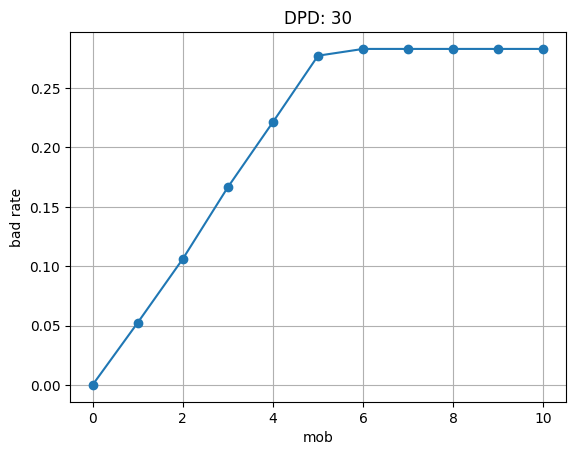

In [11]:
# Set DPD label definition
dpd = 30

# Path to the folder containing all parquet files
folder_path = silver_loan_daily_directory

# ✅ Filter only loan daily parquet files
loan_files = [
    f for f in glob.glob(os.path.join(folder_path, '*'))
    if 'silver_loan_daily_' in os.path.basename(f)
]

if not loan_files:
    raise FileNotFoundError("No loan parquet files found. Please check the directory or file naming.")

# ✅ Read and merge all loan parquet files
df = spark.read.parquet(*loan_files)

# ✅ Check schema to avoid reading the wrong table
if "loan_start_date" not in df.columns:
    raise ValueError(
        f"The current DataFrame does not contain 'loan_start_date'. "
        f"Actual columns are: {df.columns}. "
        f"Please check if non-loan parquet files were mixed in."
    )

# Filter only loans that started before January 1, 2024
df = df.filter(col("loan_start_date") < datetime.strptime("2024-01-01", "%Y-%m-%d"))

# Create DPD flag (1 if dpd >= threshold, else 0)
df = df.withColumn("dpd_flag", F.when(col("dpd") >= dpd, 1).otherwise(0))

# Select actual bad loans (e.g., installment_num == 10)
actual_bads_df = df.filter(col("installment_num") == 10)

# Convert to pandas for visualization
pdf = df.toPandas()

# Group by 'mob' and calculate bad rate
grouped = pdf.groupby('mob')['dpd_flag'].mean().sort_index()

# Plot the bad rate curve
grouped.plot(kind='line', marker='o')
plt.title(f'DPD: {dpd}')
plt.xlabel('mob')
plt.ylabel('bad rate')
plt.grid(True)
plt.show()


In [12]:
df.show()

+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|             loan_id|Customer_ID|loan_start_date|tenure|installment_num|loan_amt|due_amt|paid_amt|overdue_amt|balance|snapshot_date|mob|installments_missed|first_missed_date|dpd|dpd_flag|
+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|CUS_0x1011_2023_1...| CUS_0x1011|     2023-11-01|    10|             10| 10000.0| 1000.0|  1000.0|        0.0|    0.0|   2024-09-01| 10|                  0|             NULL|  0|       0|
|CUS_0x1013_2023_1...| CUS_0x1013|     2023-12-01|    10|              9| 10000.0| 1000.0|  1000.0|        0.0| 1000.0|   2024-09-01|  9|                  0|             NULL|  0|       0|
|CUS_0x1018_2023_1...| CUS_0x1018|     2023-11-01|    1

## Build gold table for labels

In [13]:
# create bronze datalake
gold_label_store_directory = "datamart/gold/label_store/"

if not os.path.exists(gold_label_store_directory):
    os.makedirs(gold_label_store_directory)

In [14]:
# # run gold backfill
# for date_str in dates_str_lst:
#     utils.data_processing_gold_table.process_labels_gold_table(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6)
#     utils.data_processing_gold_features.process_gold_customer_feature_store(date_str, silver_loan_daily_directory, gold_label_store_directory, spark)

# Gold backfill for labels + feature store
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_labels_gold_table(
        date_str, 
        silver_loan_daily_directory, 
        gold_label_store_directory, 
        spark, 
        dpd=30, 
        mob=6)

    gold_feature_df = utils.data_processing_gold_features.process_gold_customer_feature_store(
        date_str, 
        silver_loan_daily_directory,  
        gold_label_store_directory, 
        spark)

    print(f"[GOLD] {date_str}: Feature store row count = {gold_feature_df.count()}, columns = {len(gold_feature_df.columns)}")

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530


saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/app/datamart/silver/loan_daily/loan_daily/silver_loan_daily_2023_01_01.parquet. SQLSTATE: 42K03

In [ ]:
label_gold_df = utils.data_processing_gold_table.process_labels_gold_table(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6).dtypes
print(label_gold_df.dtypes)

feature_gold_df = utils.data_processing_gold_features.process_gold_customer_feature_store(ate_str, silver_loan_daily_directory, gold_label_store_directory, spark)
print(feature_gold_df.dtypes)

## inspect label store

In [ ]:
folder_path = gold_label_store_directory
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)
print("row_count:",df.count())

df.show()

In [ ]:
df.printSchema()